In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load Data
url = "column_2C_weka.csv"
data = pd.read_csv(url)

# Preview data
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())
print("Missing Values:\n", data.isnull().sum())

Data Head:
    pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------ 

In [ ]:
# Step 3: Preprocessing

# Feature-target split
X = data.drop('class', axis=1)
y = data['class']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [4]:
# Step 4: Build Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Store model performance
accuracy_scores = {}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.9032258064516129
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.94      0.93      0.93        69
      Normal       0.80      0.83      0.82        24

    accuracy                           0.90        93
   macro avg       0.87      0.88      0.88        93
weighted avg       0.90      0.90      0.90        93

Confusion Matrix:
 [[64  5]
 [ 4 20]]

Model: Decision Tree
Accuracy: 0.8172043010752689
Classification Report:
               precision    recall  f1-score   support

    Abnormal       0.89      0.86      0.87        69
      Normal       0.63      0.71      0.67        24

    accuracy                           0.82        93
   macro avg       0.76      0.78      0.77        93
weighted avg       0.83      0.82      0.82        93

Confusion Matrix:
 [[59 10]
 [ 7 17]]

Model: Random Forest
Accuracy: 0.8387096774193549
Classification Report:
               precision    recall  f1-s

In [5]:
# Data for visualizations
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Collecting metrics for comparison
metrics = {
    "Model": [],
    "Metric": [],
    "Score": []
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    for metric in ["precision", "recall", "f1-score"]:
        metrics["Model"].append(model_name)
        metrics["Metric"].append(metric)
        metrics["Score"].append(report["weighted avg"][metric])

metrics_df = pd.DataFrame(metrics)

C:\Users\HP\AppData\Local\Temp\ipykernel_7648\2231996248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


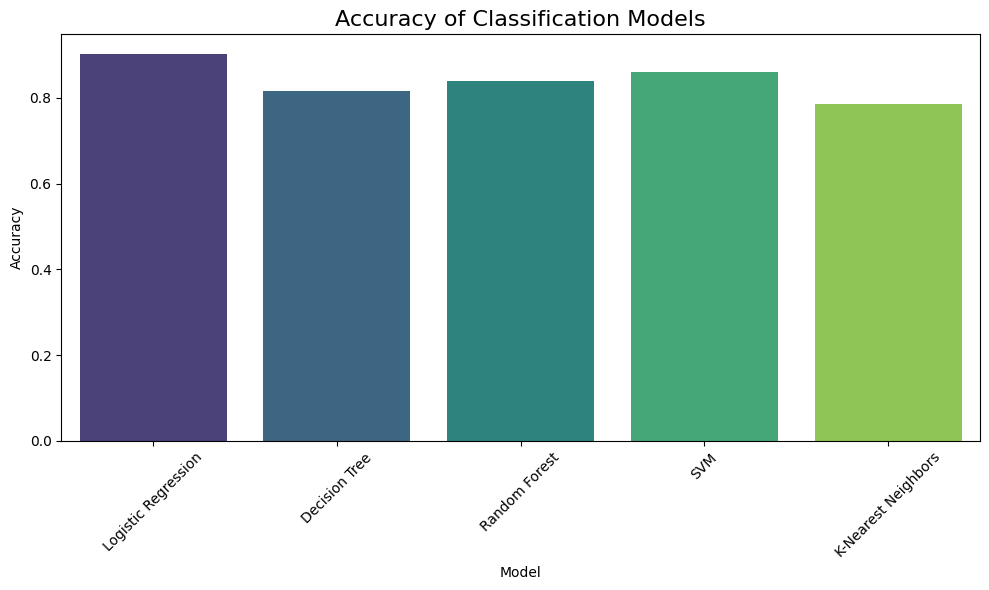

In [6]:
# 1. Bar Plot of Model Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Accuracy of Classification Models", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

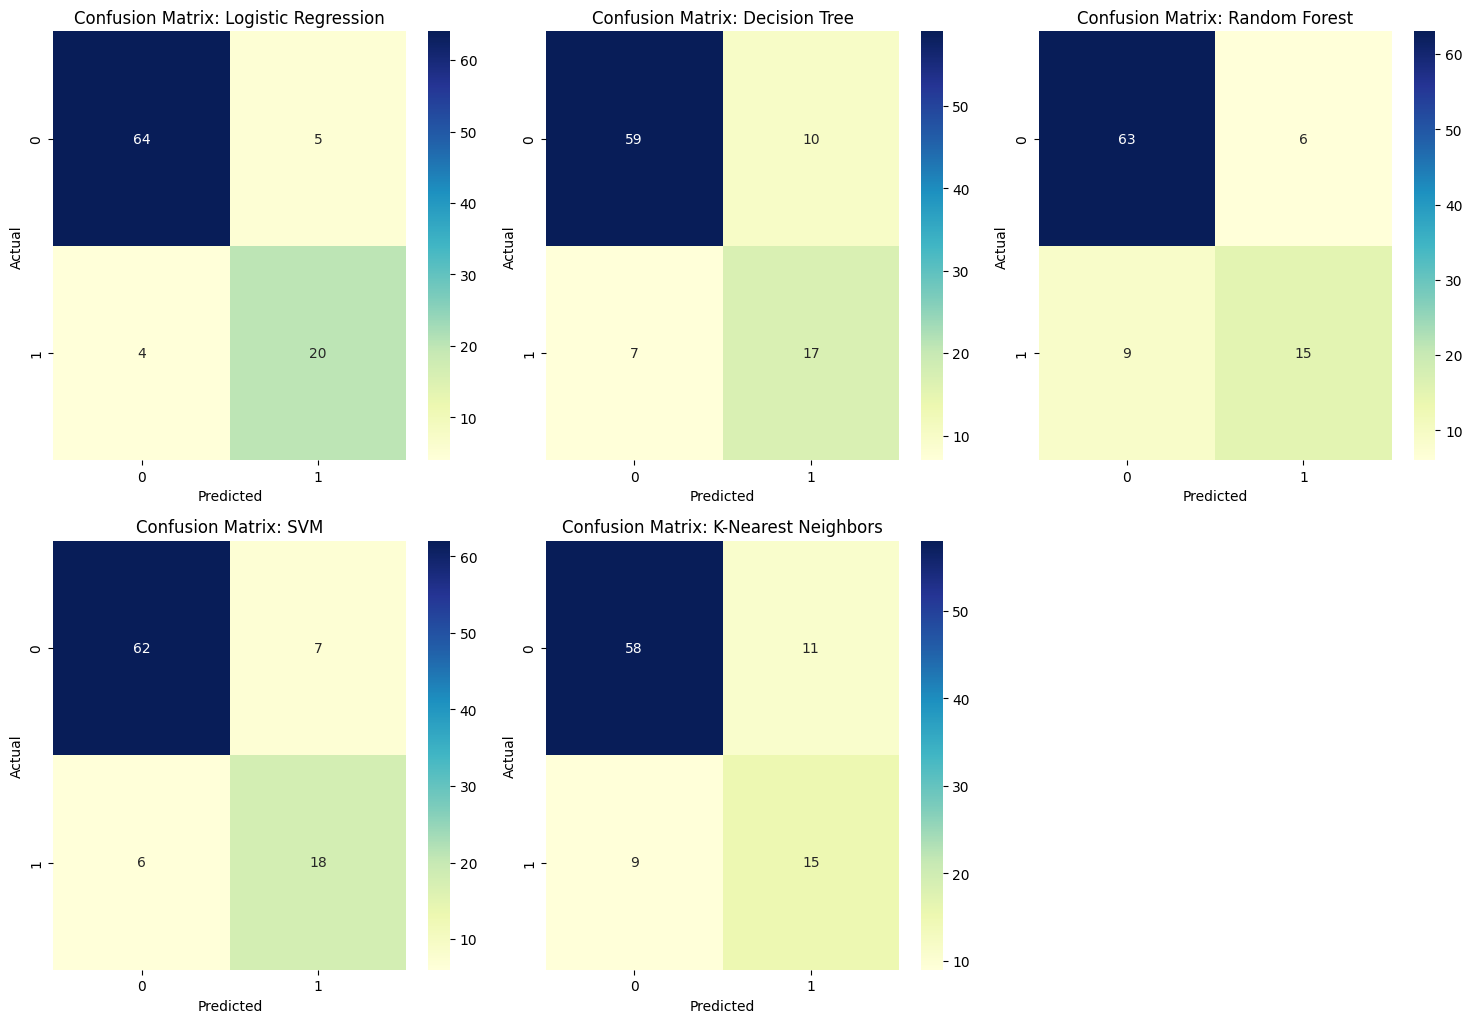

In [7]:
# 2. Confusion Matrix Heatmaps
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {model_name}", fontsize=12)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove extra subplots
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

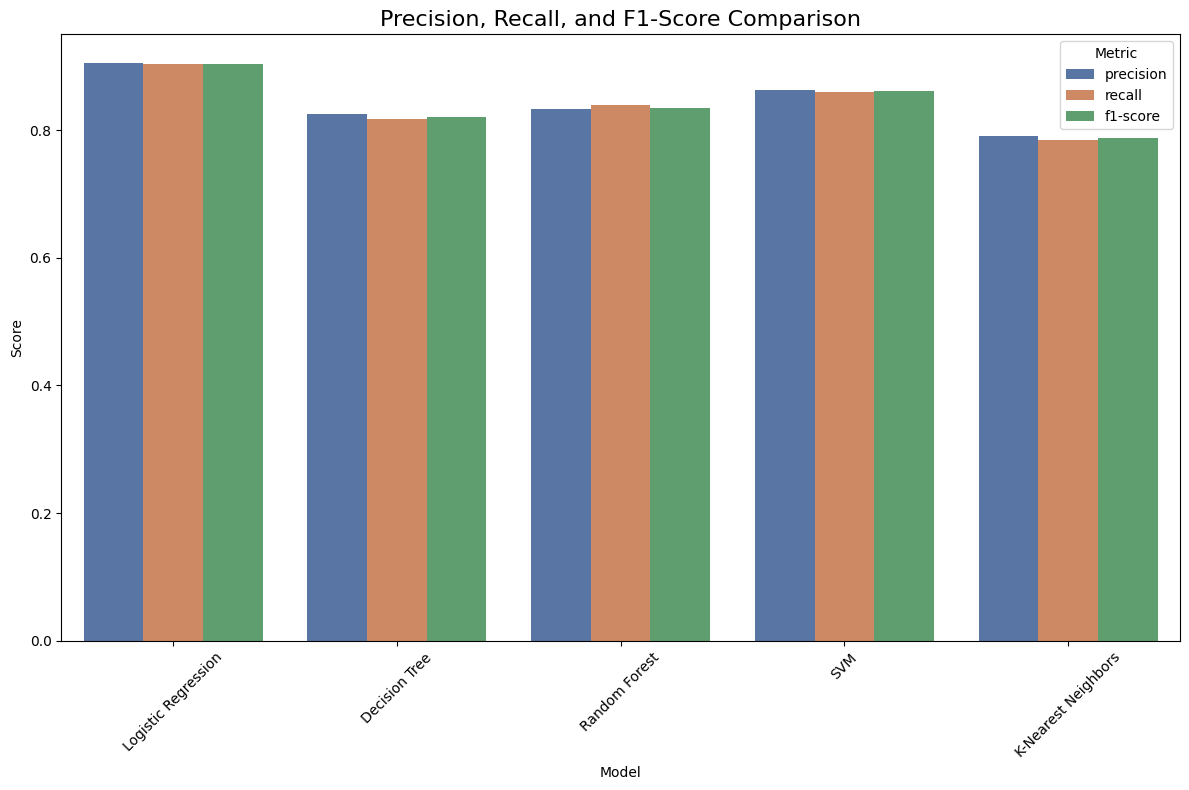

In [8]:
# 3. Precision, Recall, and F1-Score Comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x="Model", y="Score", hue="Metric", palette="deep")
plt.title("Precision, Recall, and F1-Score Comparison", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()